In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, vmap, config
import jax
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt

config.update("jax_enable_x64", True)

gpu_device = jax.devices('gpu')[0]
cpu_device = jax.devices('cpu')[0]

/home/shanj/miniconda3/envs/jax-new/lib/python3.12/site-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [19]:
Na = 36

a = jqt.destroy(Na)
adag = jqt.dag(a)

vac = jqt.basis(Na, 0)

K = 0.1 # [GHz]
eps_2 = 2*K

def Ht(t):
    return -K * adag @ adag @ a @ a + eps_2 * (adag @ adag + a @ a)

ts = jnp.linspace(0,40,101) # [ns]
c_ops = []
initial_state = vac 

/home/shanj/miniconda3/envs/jax-new/lib/python3.12/site-packages/equinox/_jit.py:49: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
  out = fun(*args, **kwargs)


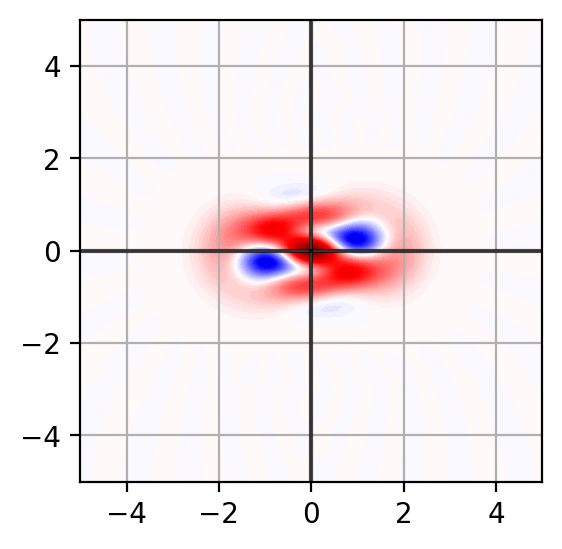

In [20]:
pts = jnp.linspace(-5,5,101)
states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 
jqt.plot_wigner(jqt.ptrace(states[-1], 0), pts=pts)